In [1]:
!pip install praw

In [62]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
import praw

reddit = praw.Reddit(
    client_id="8MguWY6Vv2iwDw",  
    client_secret="GyXPBkZaNZn1GT8o_K3lNXqx8mU",
    user_agent="Chrome:EloR Miner:v0.1 (by u/inutard)")

# From a glance at the daily top threads, gaming seems to be most popular
# We'll mine from a specific subreddit to make sure theres some overlap in the user base
thread_scores = []
subreddit_name = "SubredditSimulator"
# Each thread of O(1000) comments takes about 3min to process
count = 0
for submission in reddit.subreddit("SubredditSimulator").top(limit=5000):
    if count % 100 == 0:
        print(submission.title, submission.num_comments, submission.score)
    count += 1
    submission.comments.replace_more(limit=None)
    scores = []
    for comment in submission.comments:
        try:
            scores.append((comment.score, comment.author.name))
        except:
            # Likely deleted comments
            pass
    thread_scores.append(scores)

<--------------Number of people that think Donald Trump has dismissed FBI Director James Comey 66 64220
MRW I get an erection, but she doesn't believe in global warming 117 17268
So this is pretty WHOA 36 12864
[NSFW] My SO drew this while on hold with Comcast 40 10042
Promoter of £21m pyramid scam ordered to pay poet to live stream the inside of your dog with a pudding bowl near Cheltenham 23 8678
If I was a LIBERAL that believed the NRA was a 12 yr old boy aspiring to be Renewed 23 7765
We live in a picture 24 7100
How the United States built a welfare state for the segregationist Senator William Fulbright as a Lv 9 Support Fiddlesticks 24 6362
This ketchup package has tomato ketchup written in an account called u/undefined which has just hatched after 18 days of rain, my fence has legs, but only regular XL in Brazil 29 5882
I don't like having to explain it to Me.'" -Matthew 25:40 45 5467


In [12]:
thread_scores[0]

[(3421, 'AskHistorians_SS'),
 (1151, 'JusticePorn_SS'),
 (522, 'Christianity_SS'),
 (318, 'TotesMessenger'),
 (104, 'hearthstone_SS'),
 (43, 'hiphopheads_SS'),
 (39, 'funny_SS'),
 (30, 'boardgames_SS'),
 (-7, 'EarthPorn_SS'),
 (-17, 'CasualConversationSS')]

In [13]:
# Total number of unique comments
len(set(s[1] for score in thread_scores for s in score))

275

In [14]:
# Frequencies of top posters
from collections import Counter
C = Counter(list(s[1] for score in thread_scores for s in score))
C.most_common(50)

[('TotesMessenger', 642),
 ('baseball_SS', 70),
 ('uwotm8_SS', 65),
 ('Justrolledinshop_SS', 64),
 ('Military_SS', 64),
 ('MMA_SS', 61),
 ('JusticePorn_SS', 59),
 ('france_SS', 59),
 ('Libertarian_SS', 59),
 ('ProtectAndServe_SS', 59),
 ('offmychest_SS', 59),
 ('raisedbynarcissistSS', 58),
 ('MensRights_SS', 58),
 ('creepyPMs_SS', 58),
 ('confession_SS', 58),
 ('dogs_SS', 58),
 ('TalesFromRetail_SS', 57),
 ('reactiongifs_SS', 57),
 ('OutOfTheLoop_SS', 57),
 ('zen_SS', 57),
 ('technology_SS', 57),
 ('seduction_SS', 56),
 ('Eve_SS', 56),
 ('malefashionadvice_SS', 56),
 ('AskReddit_SS', 56),
 ('news_SS', 55),
 ('dataisbeautiful_SS', 55),
 ('teenagers_SS', 55),
 ('me_irl-SS', 55),
 ('LetsNotMeet-SS', 55),
 ('de_SS', 54),
 ('trashy-SS', 54),
 ('relationships_SS', 54),
 ('Games_SS', 53),
 ('DnD_SS', 53),
 ('KerbalSpaceProgramSS', 53),
 ('AdviceAnimals_SS', 53),
 ('photoshopbattles-SS', 53),
 ('explainlikeimfive_SS', 53),
 ('woahdude_SS', 53),
 ('hearthstone_SS', 52),
 ('gifs_SS', 52),
 ('bad

In [15]:
# Total number of comments
sum(len(s) for s in thread_scores)

13062

In [16]:
thread_scores[0]

[(3421, 'AskHistorians_SS'),
 (1151, 'JusticePorn_SS'),
 (522, 'Christianity_SS'),
 (318, 'TotesMessenger'),
 (104, 'hearthstone_SS'),
 (43, 'hiphopheads_SS'),
 (39, 'funny_SS'),
 (30, 'boardgames_SS'),
 (-7, 'EarthPorn_SS'),
 (-17, 'CasualConversationSS')]

In [36]:
import json
from collections import defaultdict

for tid, thread in enumerate(thread_scores):
    data = {}
    data['id'] = tid
    data['name'] = "To be filled."
    data['time_seconds'] = 0
    
    standings = []
    data['standings'] = standings
    
    names = set()
    # Remove duplicate comments by consolidating votes
    together = defaultdict(int)
    for user in thread:
        together[user[1]] += user[0]
    thread = [(x[1], x[0]) for x in together.items()]
    
    thread = sorted(thread, reverse=True)
    # Use -1 as placeholder value
    lscore, lo, hi = -1, -1, -1
    backlog = []
    for user in thread:
        if user[0] != lscore:
            for name in backlog:
                standings.append([name, lo, hi])
            lo = hi = hi + 1
            backlog = []
        else:
            hi += 1
        backlog.append(user[1])
        lscore = user[0]
        
    for name in backlog:
                standings.append([name, lo, hi])
    
    with open('../cache/reddit/' + str(tid) + '.json', 'w') as out:
        json.dump(data, out)

In [33]:
contest_ids = list(range(len(thread_scores)))
with open('../data/reddit/contest_ids.json', 'w') as out:
    out.write(str(contest_ids))

In [39]:
usernames = set(data[1] for thread in thread_scores for data in thread)

In [55]:
karmalist = []
for name in usernames:
    user = reddit.redditor(name)
    karmalist.append((user.comment_karma, user.name))
    
karmalist = sorted(karmalist, reverse=True)

In [51]:
with open('../data/reddit/true_rankings.json', 'w') as out:
    out.write(str(karmalist))

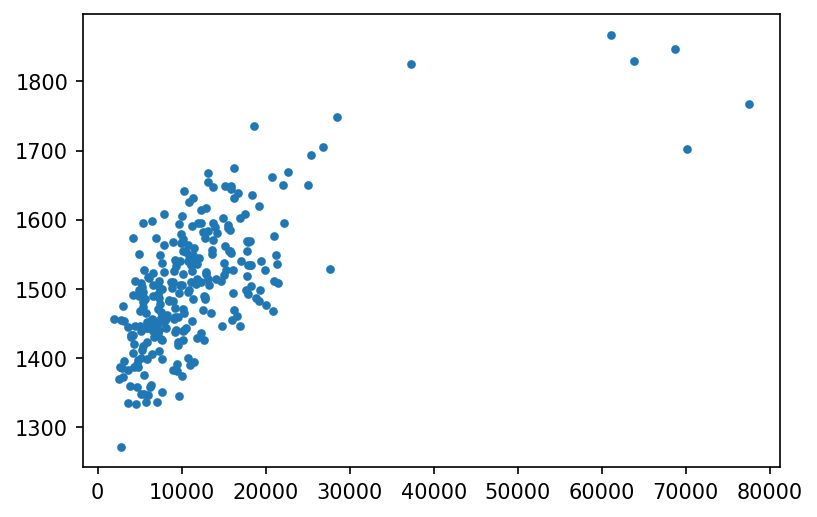

In [76]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

with open('../data/reddit/predicted_rankings.txt') as pfile:
    plines = pfile.readlines()[12:]
    joined_data = defaultdict(list)
    for data in karmalist:
        joined_data[data[1]].append(data[0])
    for line in plines:
        tokens = line.split()
        rating = int(tokens[1].split('(')[0])
        name = tokens[2]
        joined_data[name].append(rating)
        
    # Basically we can delete any users that do not end in SS
    for user in usernames:
        if 'SS' != user[-2:]:
            del joined_data[user]
        
    x, y = zip(*list(joined_data.values()))
    plt.scatter(x, y, s=10)
        